## Final Project Submission

Please fill out:
* Student name: Igor Kirko
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


**Column Names and descriptions for Kings County Data Set**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## **1. Obtaining our Data**


In [1]:
# Import all necessary libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
plt.style.use('bmh')
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#let's look at our data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## **2. Scrubbing our Data**

During this stage I will focus on things that stand out. Working with data is an iterative process. So I will be coming back to data scrubbing over and over as I go deeper and discover new things during exploratory analysis.
Things that need to be done in this stage:
* Identify and remove null values
* Check datatypes
* Identify and remove outliers
* Check for multicollinearity
* look for hidden null values and data that doesn't make sense

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### **2.1** Dealing with wrong types

Numeric variable *sqft_basement* has wrong type.

In [4]:
df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

Looks like column *'sqft_basement'* equals a difference between *'sqft_living'* and *'sqft_above'*.
I am going to recount the whole column by substracting  sqft_above from sqft_living.
This way I will get rid of potential mistakes and typos.

In [5]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

df['sqft_basement'] = df['sqft_basement'].astype('int64') # convert column to a proper type

In [6]:
df.sqft_basement.value_counts().head()

0      13110
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64

### **2.2** Dealing with null values

In [7]:
df.isna().sum() #checking for total number of Null values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* **Waterfront Null values**

In [8]:
print('Number of Null values ', df.shape[0] - df.waterfront.value_counts().sum())
print('Percentage of Null values', (1 - df.waterfront.value_counts().sum()/df.shape[0])*100)

Number of Null values  2376
Percentage of Null values 11.001527989998616


There is no way to tell if these houses have watefront view or not. So I will assign Null values to 0

In [9]:
df.waterfront.fillna(0.0, inplace=True)

* **Dealing with other Null values**

There is no realistic way we can find out was a house viewed or not as well as when it was renovated. So I will assing them all to 0.

In [10]:
df.view.fillna(0.0, inplace=True)
df.yr_renovated.fillna(0.0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### **2.3 Check data for something abnormal**

In [11]:
np.round(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,292.0,1971.0,69.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,443.0,29.0,364.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


There is a house with 33 bedrooms and 1.75 bathrooms for just 640K!!!

In [12]:
df[df['bedrooms'] >= 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060,1913,0.0,98105,47.6635,-122.320,1810,3745


I am going to drop this row along with couple of other suspicious rows.

In [13]:
df.drop([8748, 15147, 15856, 19239], inplace=True)

I will do the same for bathrooms.

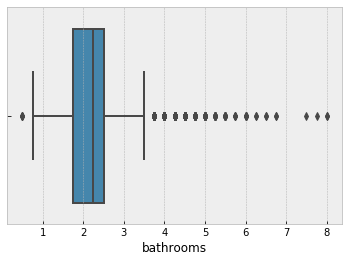

In [14]:
sns.boxplot(df.bathrooms)# checking for outliers
plt.show()

In [15]:
df = df[df['bathrooms'] <= 7]

### 2.4 Check for Multicollinearity.

Some predictors can be correlated with each other more than with target variable. I need to avoid that as it will affect the final model. I will use heatmap plot to spot most problematic variables.

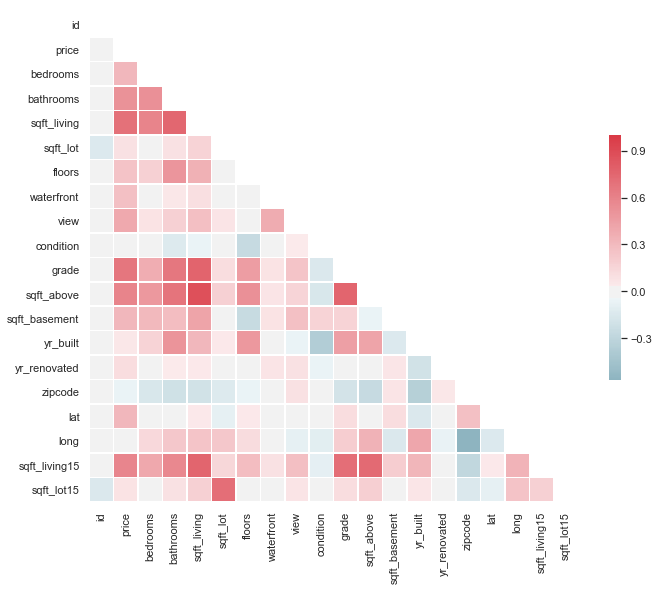

In [16]:
sns.set(style="white")
corr = df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Looks like sqft_living and sqft_above have highest correlation. I will drop the problematic one. Also I will drop id and date columns as they clearly won't help us in modelling.

In [17]:
df.drop(['sqft_above', 'id', 'date'], axis=1, inplace=True)
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,3,7,0,1955,0.0,98178,47.5112,-122.257,1340,5650


# 3. Lets Explore our Data

Let's visualize some relationships between price and other features.

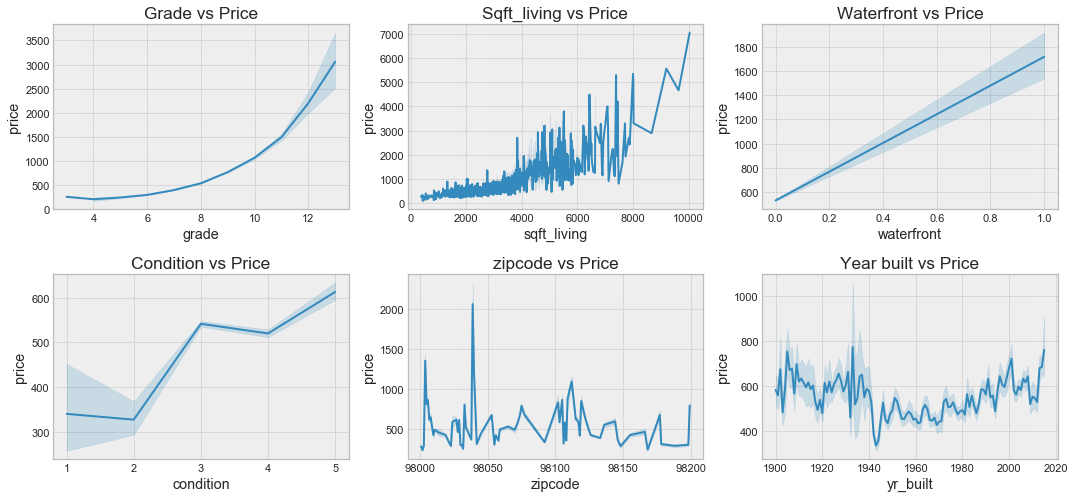

In [18]:
plt.style.use('bmh')
plt.figure(figsize=(18,8))
plt.subplot(231)
sns.lineplot(df.grade, df.price/1000)
plt.title('Grade vs Price')
plt.subplot(232)
sns.lineplot(df.sqft_living, df.price/1000)
plt.title('Sqft_living vs Price')
plt.subplot(233)
sns.lineplot(df.waterfront, df.price/1000)
plt.title('Waterfront vs Price')
plt.subplot(234)
sns.lineplot(df.condition, df.price/1000)
plt.title('Condition vs Price')
plt.subplot(235)
sns.lineplot(df.zipcode, df.price/1000)
plt.title('zipcode vs Price')
plt.subplot(236)
sns.lineplot(df.yr_built, df.price/1000)
plt.title('Year built vs Price')
plt.subplots_adjust(hspace=0.35)
plt.show()

All these features have clear affect on the price. They will most likely get in the final model.

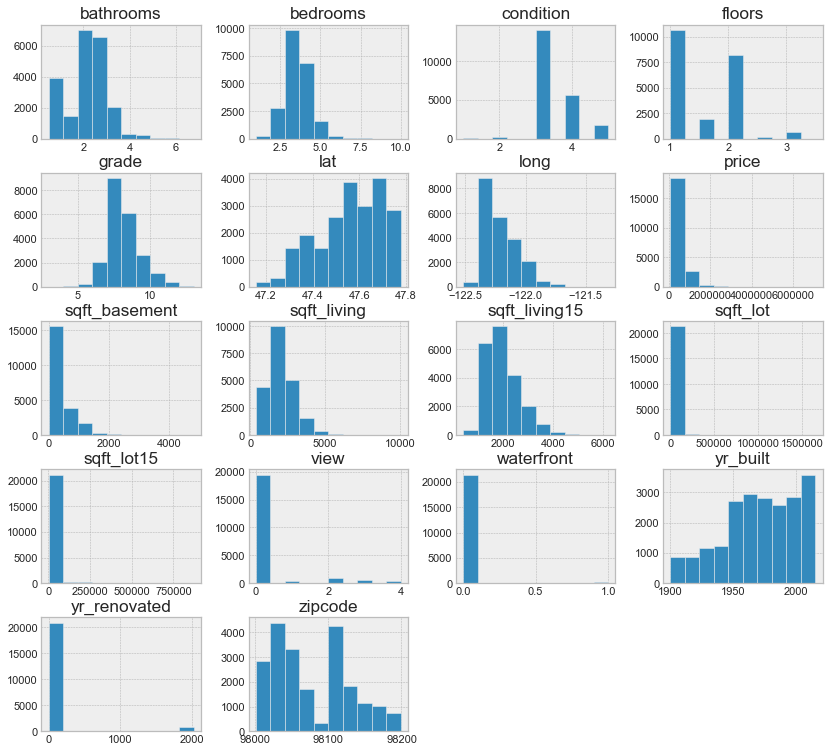

In [19]:
plt.style.use('bmh')
df.hist(figsize=(14,13));

**Almost no variables are normally distributed. Most of them are heavily skewed to the right which means there is a number of outliers. What I need to do: ** 
* Identify categorical variables and deal with them accordingly 
* Deal with heavy outliers
* Normalize our data
* Re-check our data before modelling

Let's check our variables one by one.

### 3.1 Price vs location
 Plot below shows that certain locations are more expensive. I will drop long and lat columns. Then I will turn zipcode into categorical variable. 

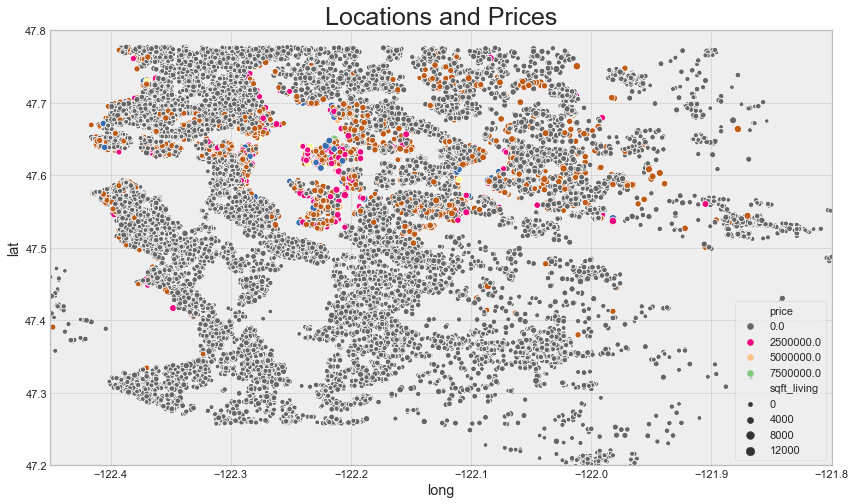

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(df.long, df.lat, hue=df.price, size=df.sqft_living, palette='Accent_r')
plt.xlim(-122.45, -121.8)
plt.ylim(47.2, 47.8)
plt.title('Locations and Prices', fontdict={'fontsize': 25})
plt.legend()
plt.show()

In [21]:
df.zipcode = df.zipcode.astype('category') #changing type
zipcode = pd.get_dummies(df.zipcode, prefix='zipcode', drop_first=True)
df = df.join(zipcode)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 87 columns):
price            21589 non-null float64
bedrooms         21589 non-null int64
bathrooms        21589 non-null float64
sqft_living      21589 non-null int64
sqft_lot         21589 non-null int64
floors           21589 non-null float64
waterfront       21589 non-null float64
view             21589 non-null float64
condition        21589 non-null int64
grade            21589 non-null int64
sqft_basement    21589 non-null int64
yr_built         21589 non-null int64
yr_renovated     21589 non-null float64
zipcode          21589 non-null category
lat              21589 non-null float64
long             21589 non-null float64
sqft_living15    21589 non-null int64
sqft_lot15       21589 non-null int64
zipcode_98002    21589 non-null uint8
zipcode_98003    21589 non-null uint8
zipcode_98004    21589 non-null uint8
zipcode_98005    21589 non-null uint8
zipcode_98006    21589 non-null uint

In [23]:
df.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)# these columns are no longer needed

### 3.2 Year Built vs. Mean Annual Price
Plot below shows some pattern in pricing. Housesbuilt in 40s and 50s cost less then other. We can deal with it by splitting year variable into bins and turn them into categories.

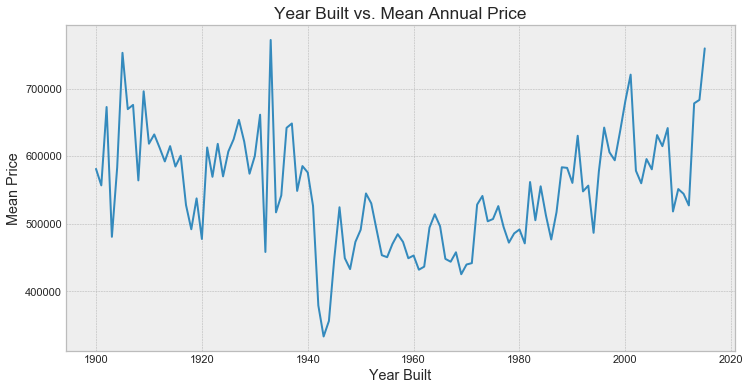

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('yr_built')['price'].mean())
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.title('Year Built vs. Mean Annual Price');

In [25]:
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
bins_yr_built = pd.cut(df.yr_built, bins)
bins_yr_built = bins_yr_built.cat.as_unordered()
dummy = pd.get_dummies(bins_yr_built, prefix='yr_built')
df = df.drop(['yr_built'], axis=1)
df = df.join(dummy)

### 3.3 Deal with sqft_basement
Lots of houses have no basement. Total sqr footage already represented in sqft_living variable. I will change sqft_basement into a new categorical variable that shows if there is a basement in a house or not.

In [26]:
df['basement'] = (df.sqft_basement > 0).astype('uint8')
df.drop(['sqft_basement'], axis=1, inplace=True)

### 3.4 Price vs view
View column doesn't affect the price. In this case I think it is best to drop this column.

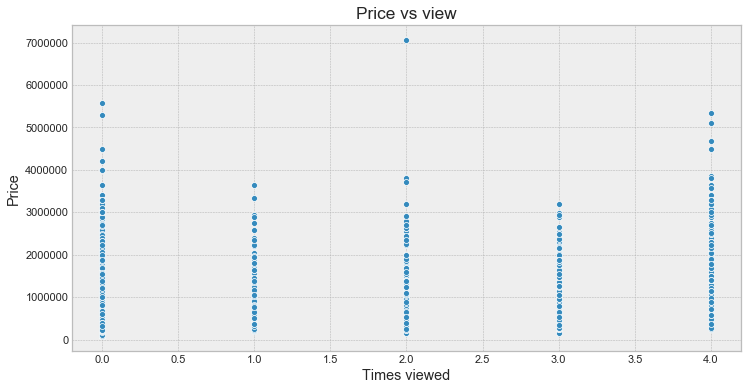

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df.view, df.price)
plt.xlabel('Times viewed')
plt.ylabel('Price')
plt.title('Price vs view')
plt.show()

In [28]:
df.drop(['view'], axis=1, inplace=True)

### 3.5 Normalize Data 
Let's load our sqrf variables again

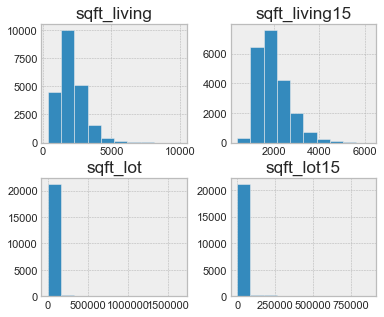

In [29]:
df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist(figsize=(6,5));

I will start normalizing data by removing outliers.

In [30]:
np.round(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_renovated,...,zipcode_98188,zipcode_98198,zipcode_98199,"yr_built_(1900, 1920]","yr_built_(1920, 1940]","yr_built_(1940, 1960]","yr_built_(1960, 1980]","yr_built_(1980, 2000]","yr_built_(2000, 2020]",basement
count,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,...,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0,21589.0
mean,539580.0,3.0,2.0,2079.0,15086.0,1.0,0.0,3.0,8.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,361420.0,1.0,1.0,911.0,41372.0,1.0,0.0,1.0,1.0,364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,645000.0,4.0,2.0,2550.0,10682.0,2.0,0.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,7060000.0,10.0,7.0,10040.0,1651359.0,4.0,1.0,5.0,13.0,2015.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


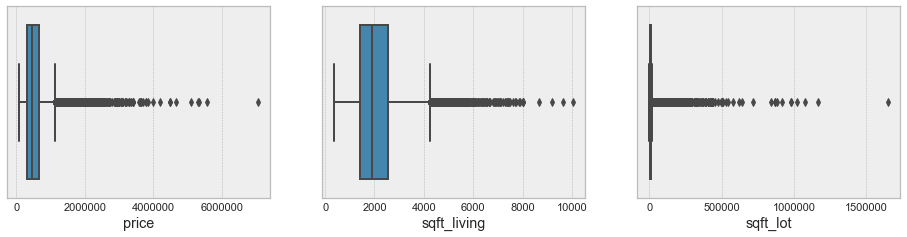

In [31]:
plt.figure(figsize=(16,12))
plt.subplot(331)
sns.boxplot(df.price)
plt.subplot(332)
sns.boxplot(df.sqft_living)
plt.subplot(333)
sns.boxplot(df.sqft_lot)
plt.show()

In [32]:
# Removing outliers from dataset
df = df[df.price < 5000000]
df = df[df.sqft_living < 10000]
df = df[df.sqft_lot < 500000]

One way to deal with skeweness is by performing log transformation.

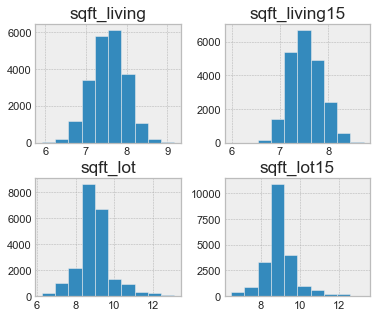

In [33]:
for col in ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']:
    df[col] = np.log(df[col])

df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist(figsize=(6,5));

Looks much better. I will log transform price as well.

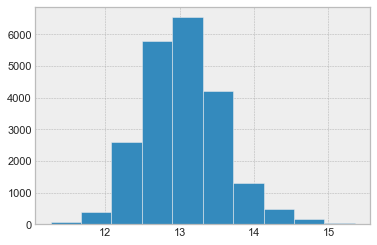

In [34]:
df['price'] = np.log(df['price'])
df.price.hist();

### 3.6 Let's re-check our data 

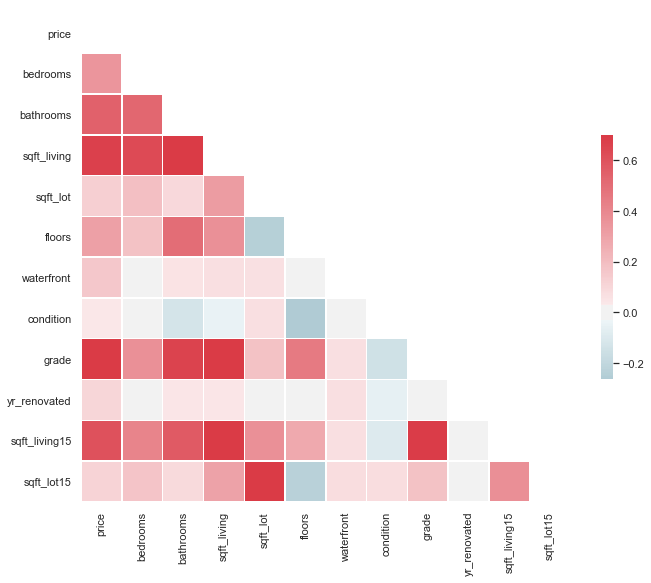

In [35]:
sns.set(style="white")
corr = df.iloc[:,:12].corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

'sqft_living15' and 'grade' are highly correlated with most of other variables. In order to avoid multicollinearity I will have to drop them. 

In [36]:
df.drop(['grade'], axis=1, inplace=True)
df.drop(['sqft_living15'], axis=1, inplace=True)


I noticed that most of the houses weren't renovated. Let's turn this variable into category as well.  

In [37]:
print(len(df[df['yr_renovated'] > 0]))
print(len(df[df['yr_renovated'] == 0]))

741
20822


In [38]:
df['is_renovated'] = (df['yr_renovated'] > 0).astype('uint8')
df.drop(['yr_renovated'], axis=1, inplace=True)

condition column is categorical variable as well

In [39]:
df['condition'] = df['condition'].astype('category')
df = pd.get_dummies(df)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21563 entries, 0 to 21596
Data columns (total 90 columns):
price                    21563 non-null float64
bedrooms                 21563 non-null int64
bathrooms                21563 non-null float64
sqft_living              21563 non-null float64
sqft_lot                 21563 non-null float64
floors                   21563 non-null float64
waterfront               21563 non-null float64
sqft_lot15               21563 non-null float64
zipcode_98002            21563 non-null uint8
zipcode_98003            21563 non-null uint8
zipcode_98004            21563 non-null uint8
zipcode_98005            21563 non-null uint8
zipcode_98006            21563 non-null uint8
zipcode_98007            21563 non-null uint8
zipcode_98008            21563 non-null uint8
zipcode_98010            21563 non-null uint8
zipcode_98011            21563 non-null uint8
zipcode_98014            21563 non-null uint8
zipcode_98019            21563 non-null uint8
zip

# 4. Modelling our Data

Our data is prepared. The main goal here is to create a model that won't be overfitted or underfitted. It has to be well balanced and be able to make accurate predictions.
During this stage I will:
* Make an initial modelling, spot and get rid of insignificant features.
* Perform train/test split on our data
* Perform cross validation 


In [41]:
X = df.drop(['price'],axis=1)
y = df.price

In [42]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1429.
Date:                Sat, 29 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:42:26   Log-Likelihood:                 4083.0
No. Observations:               21563   AIC:                            -7988.
Df Residuals:                   21474   BIC:                            -7278.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.5547      0.040    140.305      0.000       5.477       5.632
bedrooms                 -0.0372      0.002    -17.832      0.000      -0.041      -0.033
bathrooms                 0.0589      0.003     17.880      0.000       0.052       0.065
sqft_living               0.6551      0.007     99.610      0.000       0.642       0.668
sqft_lot                  0.0846      0.004     20.418      0.000       0.076       0.093
floors                   -0.0176      0.004     -4.212      0.000      -0.026      -0.009
waterfront                0.7186      0.017     41.292      0.000       0.685       0.753
sqft_lot15                0.0122      0.004      2.733      0.006       0.003       0.021
zipcode_98002            -0.0239      0.018     -1.342      0.180      -0.059       0.011
zipcode_98003             0.0738      0.016      4.607      0.000       0.042       0.105
zipcode_98004             1.2517      0.016     79.912      0.000       1.221       1.282
zipcode_98005             0.8434      0.019     44.659      0.000       0.806       0.880
zipcode_98006             0.7989      0.014     56.950      0.000       0.771       0.826
zipcode_98007             0.7461      0.020     37.263      0.000       0.707       0.785
zipcode_98008             0.7539      0.016     46.847      0.000       0.722       0.785
zipcode_98010             0.1963      0.023      8.599      0.000       0.152       0.241
zipcode_98011             0.4890      0.018     27.358      0.000       0.454       0.524
zipcode_98014             0.2469      0.021     11.514      0.000       0.205       0.289
zipcode_98019             0.2733      0.018     15.134      0.000       0.238       0.309
zipcode_98022             0.0374      0.017      2.188      0.029       0.004       0.071
zipcode_98023             0.0316      0.014      2.266      0.023       0.004       0.059
zipcode_98024             0.3775      0.025     14.995      0.000       0.328       0.427
zipcode_98027             0.5645      0.015     38.806      0.000       0.536       0.593
zipcode_98028             0.4527      0.016     28.345      0.000       0.421       0.484
zipcode_98029             0.6709      0.016     43.134      0.000       0.640       0.701
zipcode_98030             0.0560      0.016      3.412      0.001       0.024       0.088
zipcode_98031             0.0918      0.016      5.688      0.000       0.060       0.123
zipcode_98032             0.0341      0.021      1.632      0.103      -0.007       0.075
zipcode_98033             0.8692      0.014     60.462      0.000       0.841       0.897
zipcode_98034             0.6118      0.014     44.606      0.000       0.585       0.639
zipcode_98038             0.1423      0.013     10.552      0.000       0.116       0.169
zipcode_98039          

Looks pretty good. R squared score is pretty high but it is too early to call this a good model. We need to check it first.
I will start by removing insignificant features. Everything with p-value greater than 0.05 must go.

In [43]:
pvals = pd.DataFrame(model.pvalues, columns=['Pvalue'])
insignif = pvals[pvals['Pvalue'] > 0.05]
print('Features to drop:')
print(insignif)
df.drop(insignif.index, axis=1, inplace=True) 

Features to drop:
                         Pvalue
zipcode_98002          0.179736
zipcode_98032          0.102610
yr_built_(1900, 1920]  0.692943
yr_built_(1920, 1940]  0.388546
yr_built_(1980, 2000]  0.855557


### 4.1 Train test split

In [44]:
X = df.drop(['price'],axis=1)
y = df.price

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # splitting our data 60/40
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

print(len(X_train), len(X_test), len(y_train), len(y_test)) # just checking to make sure everything is right

12937 8626 12937 8626


####  Root Mean Squared Error

Great way to check how well our model perform. It shows difference between predicted values and the actual values. The lower RMSE score the better our model performs.

In [54]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print('Train Root Mean Squarred Error:', round(train_rmse,5))
print('Test Root Mean Squarred Error:', round(test_rmse,5))
print('---------------------------------------------------')
print('R^2 Score:',round(linreg.score(X, y),2))
print('---------------------------------------------------')

Train Root Mean Squarred Error: 0.2005
Test Root Mean Squarred Error: 0.20114
---------------------------------------------------
R^2 Score: 0.85
---------------------------------------------------


Everything looks good so far. Let's do our final check.

### 4.2 Cross-validation score

Using this method I will split data into 20 random groups. It will leave 1 group as test data and use the rest 19 as train data. Then it will fit a model on the training data and evaluate it on the test data. Repeat it another 19 times for each group. This method should give a pretty accurate estimate of how our model is doing.

In [55]:
scores = np.mean(cross_val_score(linreg, X, y, cv=20))
print("Performance score", round(scores * 100), '%')
print('---------------------------------------------------')

Performance score 85.0 %
---------------------------------------------------


# 5. Conclusion

Overall our model works pretty well. Plot below shows that our model predict prices with solid accuracy. 

---------------------------------------------------
Average Predicted Price: 524732.0
Average Actual Price: 539702
---------------------------------------------------


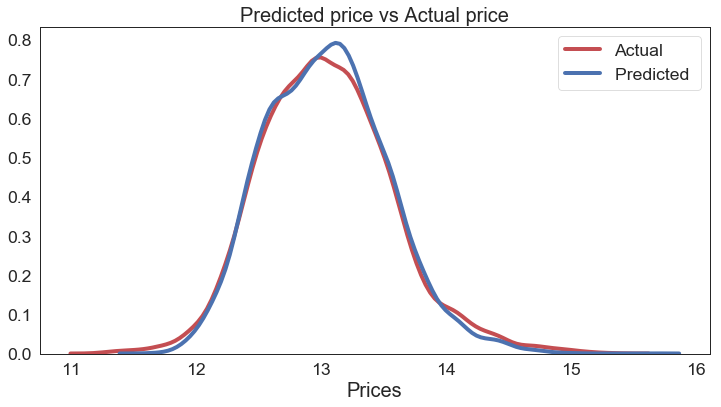

In [56]:
plt.figure(figsize=(12,6))
sns.set_context('paper',font_scale=2, rc={"font.size":6,"axes.labelsize":3,"lines.linewidth": 4})

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual") # plotting actuall prices

sns.distplot(y_hat_test, hist=False, color="b", label="Predicted " , ax=ax1) # adding predicted prices on the same axis

plt.title('Predicted price vs Actual price', fontdict={'fontsize': 20})
plt.xlabel('Prices',fontdict={'fontsize': 20});

print('---------------------------------------------------')
print('Average Predicted Price:', round(np.exp(y_hat_test).mean()))  #transform prices back to normal
print('Average Actual Price:', round(np.exp(y_test).mean()))
print('---------------------------------------------------')


Most influential features are:
1. **Grade.** Most powerfull feature. I decided to drop it because it greatly influences all features and I feared that it will overfit our model.
2. **Square footage.** Obvious one. More living space cost more money.
3. **Bathrooms, bedrooms and basement.** I put them all together because they interconnected with each other and Square footage. The more of those you have the bigger your house is. At the same time extra bathrooms and bedrooms indicate that house is likely to be new or renovated which means increase in cost. 
4. **Waterfront.** Vaguely correlated with all features but price. That means no matter what grade or square footage house have this feature alone will significantly increase price.
5. **Zipcode.** Certain areas influence price greatly.

### Most significant features

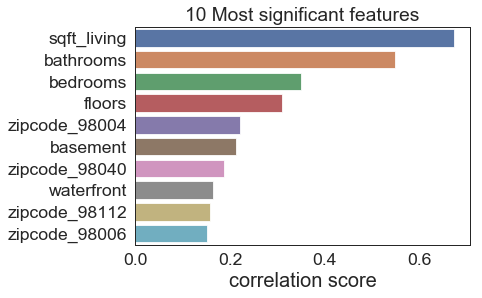

In [49]:
f_corr = df.corr()
f_corr.drop('price', inplace=True)
signif = pd.DataFrame(f_corr.price.sort_values(ascending=False))
sns.barplot(signif.price[:10], signif.index[:10])
plt.title('10 Most significant features')
plt.xlabel('correlation score',fontdict={'fontsize': 20})
plt.show()
